In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('/content/h1n1_vaccine_prediction.csv')

In [6]:
df.shape

(26707, 34)

In [7]:
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [9]:
df.drop(['unique_id'], inplace = True, axis = 1)

In [10]:
df.isnull().sum()



h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status                2042
employment          

In [11]:
df['h1n1_worry'].unique()

array([ 1.,  3.,  2.,  0., nan])

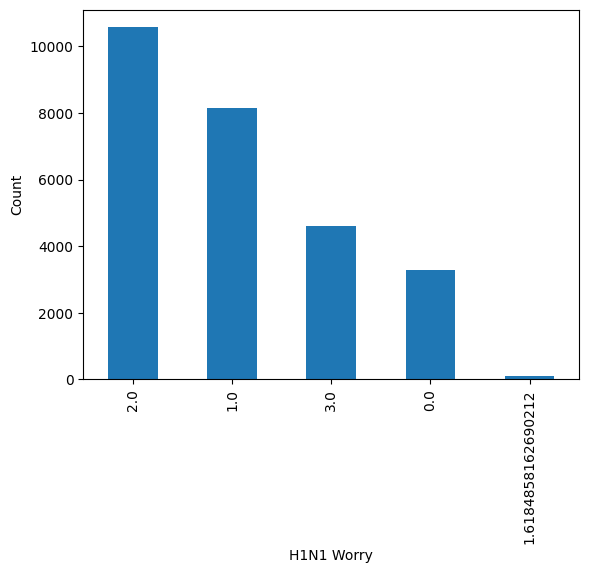

By-Abhinandan Kesarwani 


In [92]:
df['h1n1_worry'].value_counts().plot(kind = 'bar')
plt.xlabel('H1N1 Worry')
plt.ylabel('Count')
plt.show()
print('By-Abhinandan Kesarwani ')

In [13]:
df['h1n1_awareness'].unique()

array([ 0.,  2.,  1., nan])

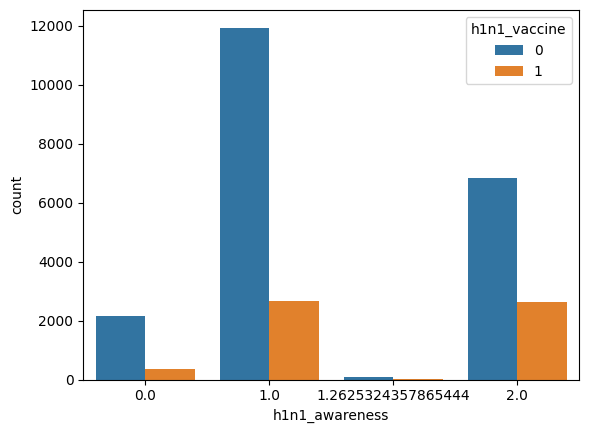

By-Abhinandan Kesarwani 


In [91]:
sns.countplot(x = 'h1n1_awareness', data = df, hue = 'h1n1_vaccine')
plt.show()
print('By-Abhinandan Kesarwani ')

In [15]:
df['antiviral_medication'].unique()

array([ 0.,  1., nan])

ValueError: 'explode' must be of length 'x'

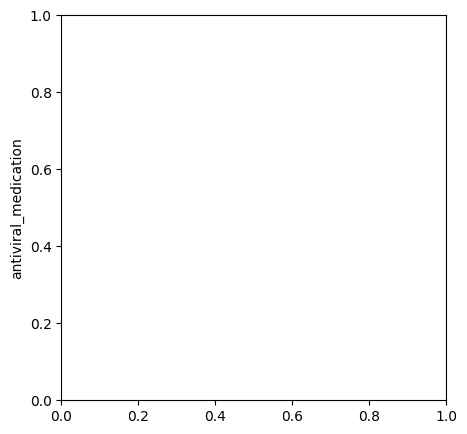

In [90]:
df['antiviral_medication'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', figsize = [5,5], explode = [0,0.2])
plt.show()
print('By-Abhinandan Kesarwani ')

In [17]:
df['contact_avoidance'].unique()

array([ 0.,  1., nan])

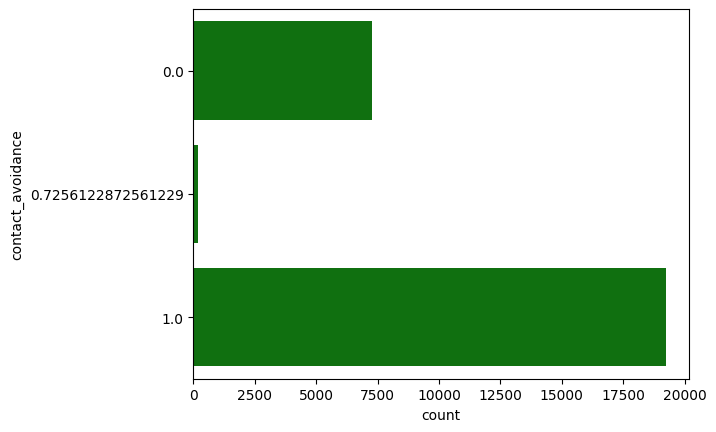

By-Abhinandan Kesarwani 


In [89]:
sns.countplot(y = 'contact_avoidance', data = df, color = 'green')
plt.show()
print('By-Abhinandan Kesarwani ')

In [19]:
df['bought_face_mask'].unique()

array([ 0.,  1., nan])

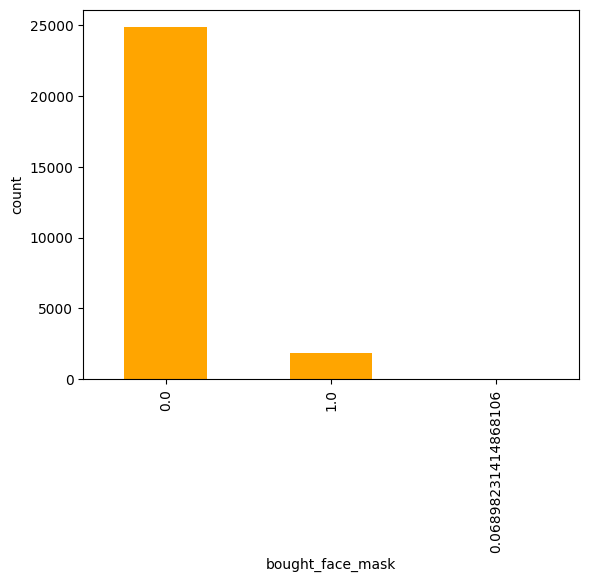

By-Abhinandan Kesarwani 


In [88]:
df['bought_face_mask'].value_counts().plot(kind = 'bar', color = 'orange')
plt.xlabel('bought_face_mask')
plt.ylabel('count')
plt.show()
print('By-Abhinandan Kesarwani ')

In [21]:
df['wash_hands_frequently'].unique()



array([ 0.,  1., nan])

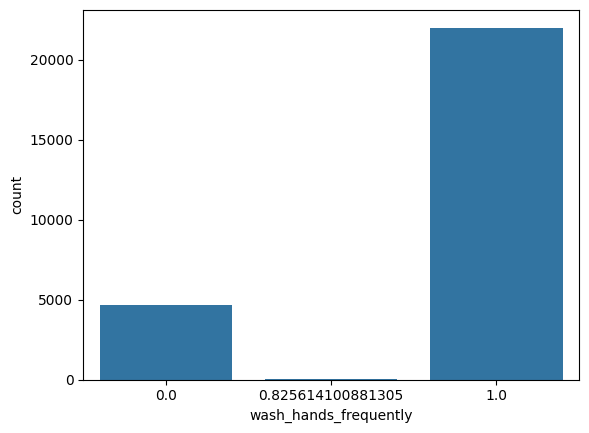

By-Abhinandan Kesarwani 


In [87]:
sns.countplot(x = 'wash_hands_frequently', data =df)
plt.show()
print('By-Abhinandan Kesarwani ')

In [23]:
df['avoid_large_gatherings'].unique()

array([ 0.,  1., nan])

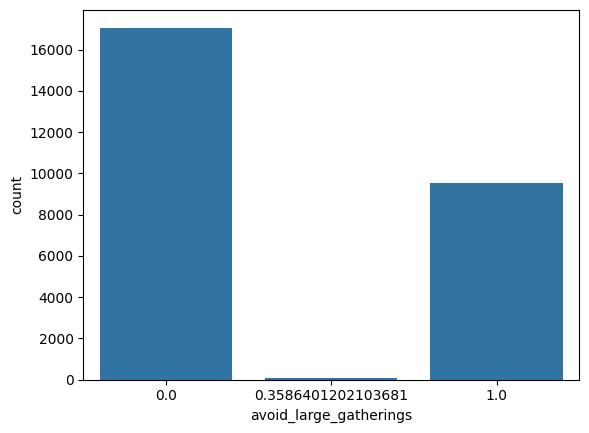

By-Abhinandan Kesarwani 


In [86]:
sns.countplot(x = 'avoid_large_gatherings', data =df)
plt.show()
print('By-Abhinandan Kesarwani ')

By-Abhinandan Kesarwani 


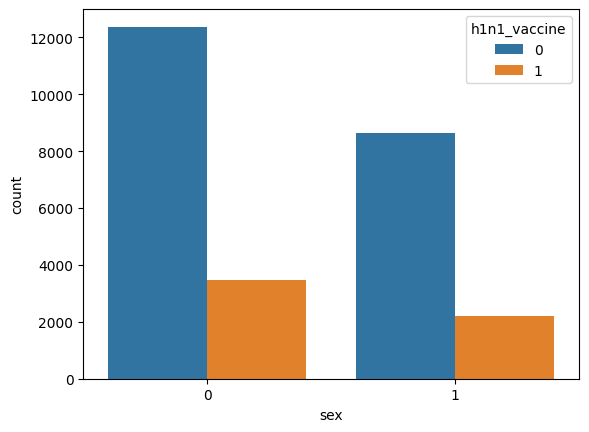

In [85]:
sns.countplot(x="sex", hue="h1n1_vaccine",data=df)
print('By-Abhinandan Kesarwani ')

By-Abhinandan Kesarwani 


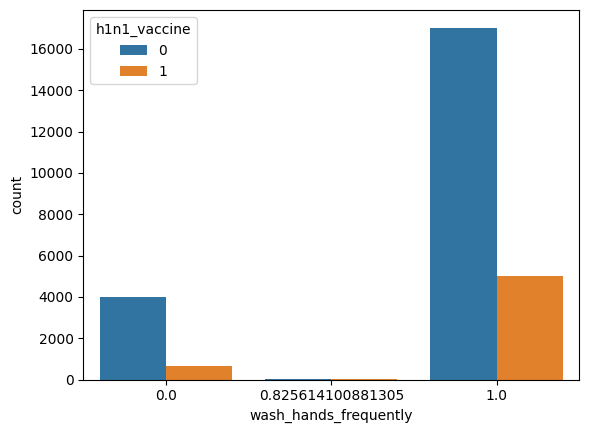

In [84]:
sns.countplot(x="wash_hands_frequently", hue="h1n1_vaccine",data=df)
print('By-Abhinandan Kesarwani ')

In [27]:
df['employment'].unique()


array(['Not in Labor Force', 'Employed', 'Unemployed', nan], dtype=object)

By-Abhinandan Kesarwani 


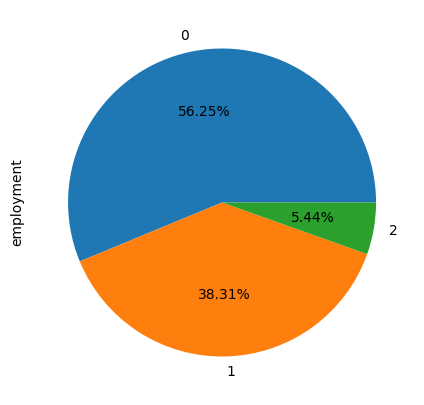

In [83]:
df['employment'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', figsize = [5,5])

print('By-Abhinandan Kesarwani ')

In [29]:
display(df['no_of_adults'].unique(), df['no_of_children'].unique())

array([ 0.,  2.,  1.,  3., nan])

array([ 0.,  3.,  2.,  1., nan])

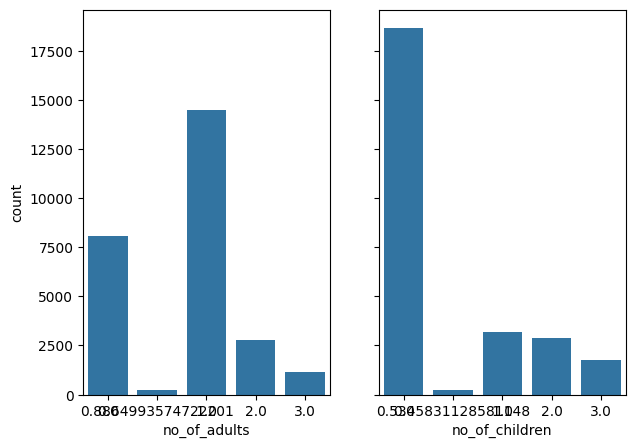

By-Abhinandan Kesarwani 


In [81]:
fig, ax = plt.subplots(1,2, figsize = [7,5], sharey = True)
sns.countplot( x = 'no_of_adults', data = df, ax = ax[0])
sns.countplot( x = 'no_of_children', data = df, ax = ax[1])
plt.show()
print('By-Abhinandan Kesarwani ')

In [31]:
import pandas as pd

# Assuming df is your DataFrame

# Categorical columns
categorical_columns = ['age_bracket', 'qualification', 'race', 'sex','income_level','housing_status', 'marital_status', 'employment', 'census_msa']

for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Numerical columns
numerical_columns = ['h1n1_worry','h1n1_vaccine', 'h1n1_awareness', 'antiviral_medication', 'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently', 'avoid_large_gatherings', 'reduced_outside_home_cont', 'avoid_touch_face','dr_recc_h1n1_vacc','dr_recc_seasonal_vacc', 'chronic_medic_condition', 'cont_child_undr_6_mnths', 'is_health_worker', 'has_health_insur','is_h1n1_vacc_effective', 'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective', 'is_seas_risky', 'sick_from_seas_vacc', 'no_of_adults', 'no_of_children']

for column in numerical_columns:
    df[column].fillna(df[column].mean(), inplace=True)

# Ordinal columns
ordinal_columns = ['h1n1_vaccine']

for column in ordinal_columns:
    df[column].fillna(df[column].median(), inplace=True)

In [32]:
df.isnull().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vac

In [33]:
df.shape

(26707, 33)

In [34]:
df.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.000000,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.000000,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.220312,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.000000,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.000000,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df["age_bracket"] = le.fit_transform(df["age_bracket"])
df["qualification"] = le.fit_transform(df["qualification"])
df["race"] = le.fit_transform(df["race"])
df["sex"] = le.fit_transform(df["sex"])
df["income_level"] = le.fit_transform(df["income_level"])
df["housing_status"] = le.fit_transform(df["housing_status"])
df["marital_status"] = le.fit_transform(df["marital_status"])
df["employment"] = le.fit_transform(df["employment"])
df["census_msa"] = le.fit_transform(df["census_msa"])

In [36]:
df.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.000000,...,3,0,2,1,0,1,2,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.000000,...,3,1,2,1,1,0,0,0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.220312,...,3,1,0,1,0,0,0,2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.000000,...,3,0,2,1,1,1,1,0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.000000,...,3,0,0,0,0,0,0,1.0,0.0,0


In [37]:
y=df['h1n1_vaccine']
x=df.drop(['h1n1_vaccine'], axis=1)

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['Var'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

In [39]:
vif_data.sort_values(by = ['VIF'], ascending = False)

,Var,VIF
18,is_seas_vacc_effective,20.706407
15,is_h1n1_vacc_effective,20.500895
14,has_health_insur,12.932391
23,race,8.881859
19,is_seas_risky,8.245599
16,is_h1n1_risky,7.467820
5,wash_hands_frequently,7.307370
0,h1n1_worry,6.145831
17,sick_from_h1n1_vacc,6.089227
1,h1n1_awareness,5.796397


In [40]:
vif_data.sort_values(by = ['VIF'], ascending = False)

,Var,VIF
18,is_seas_vacc_effective,20.706407
15,is_h1n1_vacc_effective,20.500895
14,has_health_insur,12.932391
23,race,8.881859
19,is_seas_risky,8.245599
16,is_h1n1_risky,7.467820
5,wash_hands_frequently,7.307370
0,h1n1_worry,6.145831
17,sick_from_h1n1_vacc,6.089227
1,h1n1_awareness,5.796397


In [42]:
x_train, x_test, y_train , y_test=train_test_split(x,y, test_size=.25, random_state=88)

In [43]:
log = LogisticRegression()

log.fit(x_train,y_train)

print(f"Training Score : {log.score(x_train, y_train)}")
print(f"Testing Score : {log.score(x_test, y_test)}")

Training Score : 0.8390913629555666
Testing Score : 0.8270181219110379


In [44]:
pred_train=log.predict(x_train)
pred_test=log.predict(x_test)

In [45]:
from sklearn import metrics
cnfTrain=pd.DataFrame(metrics.confusion_matrix(y_train , pred_train), columns=["Pred_0", "Pred_1"],
                index=["Act_0", "Act_1"])
cnfTrain

,Pred_0,Pred_1
Act_0,14986,818
Act_1,2405,1821


In [46]:
print(metrics.classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     15804
           1       0.69      0.43      0.53      4226

    accuracy                           0.84     20030
   macro avg       0.78      0.69      0.72     20030
weighted avg       0.83      0.84      0.82     20030



In [47]:
pd.DataFrame(log.predict_proba(x_train), columns=["Prob_0", "Prob_1"])


,Prob_0,Prob_1
0,0.964189,0.035811
1,0.981212,0.018788
2,0.668714,0.331286
3,0.977085,0.022915
4,0.932071,0.067929
...,...,...
20025,0.978795,0.021205
20026,0.895711,0.104289
20027,0.760364,0.239636
20028,0.837826,0.162174


In [48]:
x_train1=x_train.copy()

x_train1["Actual_Default"]=y_train
x_train1["Prob_Default"]=log.predict_proba(x_train)[:, 1]

x_train1

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,Actual_Default,Prob_Default
9353,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.000000,...,1,0,0,0,1,0,1.0,0.0,0,0.035811
6317,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.220312,...,0,0,1,1,0,1,1.0,0.0,0,0.018788
13542,2.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.000000,...,0,0,1,0,0,2,0.0,0.0,0,0.331286
23986,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.000000,...,0,2,1,0,1,0,0.0,0.0,0,0.022915
16025,1.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.000000,...,0,0,1,1,0,1,1.0,0.0,1,0.067929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24938,0.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.000000,...,0,0,0,1,0,2,3.0,1.0,0,0.021205
2481,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.000000,...,0,0,1,1,1,0,0.0,0.0,0,0.104289
4047,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.000000,...,1,0,0,0,0,2,1.0,2.0,0,0.239636
6432,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.000000,...,0,0,0,0,0,1,1.0,1.0,1,0.162174


In [49]:
def profile_decile(X,y,trained_model):
    X_1=X.copy()
    y_1=y.copy()
    y_pred1=trained_model.predict(X_1)
    X_1["Prob_Event"]=trained_model.predict_proba(X_1)[:,1]
    X_1["Y_actual"]=y_1
    X_1["Y_pred"]=y_pred1
    X_1["Rank"]=pd.qcut(X_1["Prob_Event"], 10, labels=np.arange(0,10,1))
    X_1["numb"]=10
    X_1["Decile"]=X_1["numb"]-X_1["Rank"].astype("int")

    profile=pd.DataFrame(X_1.groupby("Decile") \
                        .apply(lambda x: pd.Series({
        'min_score'   : x["Prob_Event"].min(),
        'max_score'   : x["Prob_Event"].max(),
        'Event'       : x["Y_actual"].sum(),
        'Non_event'   : x["Y_actual"].count()-x["Y_actual"].sum(),
        'Total'       : x["Y_actual"].count() })))
    ret

In [50]:
newtrain_pred=np.where(log.predict_proba(x_train)[:,1] > 0.232280104, 1, 0)

In [51]:
cnfNewTrain=pd.DataFrame(metrics.confusion_matrix(y_train , newtrain_pred), columns=["Pred_0", "Pred_1"],
                index=["Act_0", "Act_1"])
cnfNewTrain

,Pred_0,Pred_1
Act_0,12851,2953
Act_1,1220,3006


In [52]:
print(metrics.classification_report(y_train , newtrain_pred))

              precision    recall  f1-score   support

           0       0.91      0.81      0.86     15804
           1       0.50      0.71      0.59      4226

    accuracy                           0.79     20030
   macro avg       0.71      0.76      0.73     20030
weighted avg       0.83      0.79      0.80     20030



In [53]:
newtest_pred=np.where(log.predict_proba(x_test)[:,1] > 0.229209326, 1, 0)

In [54]:
cnfNewTest=pd.DataFrame(metrics.confusion_matrix(y_test , newtest_pred), columns=["Pred_0", "Pred_1"],
                index=["Act_0", "Act_1"])
cnfNewTest

,Pred_0,Pred_1
Act_0,4245,984
Act_1,469,979


In [55]:
print(metrics.classification_report(y_test , newtest_pred))

              precision    recall  f1-score   support

           0       0.90      0.81      0.85      5229
           1       0.50      0.68      0.57      1448

    accuracy                           0.78      6677
   macro avg       0.70      0.74      0.71      6677
weighted avg       0.81      0.78      0.79      6677



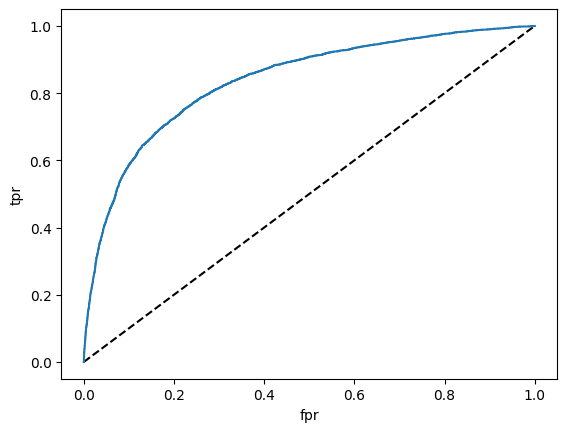

By-Abhinandan Kesarwani 


In [80]:
probs=log.predict_proba(x_train)[:,1]

fpr, tpr, threshold=metrics.roc_curve(y_train,probs )
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='logistic')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()
print('By-Abhinandan Kesarwani ')

In [57]:
metrics.roc_auc_score(y_train,probs)

0.8375097757515365

In [58]:
import pandas as pd
from sklearn import metrics

model_report = pd.DataFrame({
    'Model': ["Logical Regression"],
    'ROC Score': [metrics.roc_auc_score(y_test, newtest_pred)],
    'Precision Score': [metrics.precision_score(y_test, newtest_pred)],
    'Recall Score': [metrics.recall_score(y_test, newtest_pred)],
    'F1 Score': [metrics.f1_score(y_test, newtest_pred)],
    'Accuracy Score': [metrics.accuracy_score(y_test, newtest_pred)]
})

print(model_report)


                Model  ROC Score  Precision Score  Recall Score  F1 Score  \
0  Logical Regression   0.743962         0.498726      0.676105  0.574025   

   Accuracy Score  
0        0.782387  


In [59]:
print(pd.__version__)


1.5.3


In [60]:
from sklearn.tree import  DecisionTreeClassifier

DT_model =  DecisionTreeClassifier()
DT_model.fit(x_train, y_train)
print(f"Training Score : {DT_model.score(x_train, y_train)}")
print(f"Testing Score : {DT_model.score(x_test, y_test)}")

Training Score : 1.0
Testing Score : 0.7681593530028455


In [61]:
pred_train=DT_model.predict(x_train)
pred_test=DT_model.predict(x_test)

In [62]:
cnfTrain=pd.DataFrame(metrics.confusion_matrix(y_train , pred_train), columns=["Pred_0", "Pred_1"],
                index=["Act_0", "Act_1"])
cnfTrain

,Pred_0,Pred_1
Act_0,15804,0
Act_1,0,4226


In [63]:
print(metrics.classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15804
           1       1.00      1.00      1.00      4226

    accuracy                           1.00     20030
   macro avg       1.00      1.00      1.00     20030
weighted avg       1.00      1.00      1.00     20030



In [64]:
pd.DataFrame(DT_model.predict_proba(x_train), columns=["Prob_0", "Prob_1"])


,Prob_0,Prob_1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
20025,1.0,0.0
20026,1.0,0.0
20027,1.0,0.0
20028,0.0,1.0


In [65]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators = 2000,random_state=0)
abcl = abcl.fit(x_train, y_train)

In [66]:
pred_train=abcl.predict(x_train)
pred_test=abcl.predict(x_test)

In [67]:
cnfTrain=pd.DataFrame(metrics.confusion_matrix(y_train , pred_train), columns=["Pred_0", "Pred_1"],
                index=["Act_0", "Act_1"])
cnfTrain

,Pred_0,Pred_1
Act_0,15002,802
Act_1,2141,2085


In [68]:
print(metrics.classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     15804
           1       0.72      0.49      0.59      4226

    accuracy                           0.85     20030
   macro avg       0.80      0.72      0.75     20030
weighted avg       0.84      0.85      0.84     20030



In [69]:
pd.DataFrame(abcl.predict_proba(x_train), columns=["Prob_0", "Prob_1"])


,Prob_0,Prob_1
0,0.500319,0.499681
1,0.500443,0.499557
2,0.500018,0.499982
3,0.500537,0.499463
4,0.500238,0.499762
...,...,...
20025,0.500377,0.499623
20026,0.500375,0.499625
20027,0.500180,0.499820
20028,0.500155,0.499845


In [70]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 200,random_state=0)
gbcl = gbcl.fit(x_train, y_train)

In [71]:
pred_train=gbcl.predict(x_train)
pred_test=gbcl.predict(x_test)

In [72]:
cnfTrain=pd.DataFrame(metrics.confusion_matrix(y_train , pred_train), columns=["Pred_0", "Pred_1"],
                index=["Act_0", "Act_1"])
cnfTrain

,Pred_0,Pred_1
Act_0,15095,709
Act_1,1943,2283


In [73]:
print(metrics.classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92     15804
           1       0.76      0.54      0.63      4226

    accuracy                           0.87     20030
   macro avg       0.82      0.75      0.78     20030
weighted avg       0.86      0.87      0.86     20030



In [74]:
pd.DataFrame(abcl.predict_proba(x_train), columns=["Prob_0", "Prob_1"])


,Prob_0,Prob_1
0,0.500319,0.499681
1,0.500443,0.499557
2,0.500018,0.499982
3,0.500537,0.499463
4,0.500238,0.499762
...,...,...
20025,0.500377,0.499623
20026,0.500375,0.499625
20027,0.500180,0.499820
20028,0.500155,0.499845


In [75]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 2500, random_state=0,max_features=3)
rfcl = rfcl.fit(x_train, y_train)

In [76]:
pred_train=rfcl.predict(x_train)
pred_test=rfcl.predict(x_test)

In [77]:
cnfTrain=pd.DataFrame(metrics.confusion_matrix(y_train , pred_train), columns=["Pred_0", "Pred_1"],
                index=["Act_0", "Act_1"])
cnfTrain

,Pred_0,Pred_1
Act_0,15804,0
Act_1,0,4226


In [78]:
print(metrics.classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15804
           1       1.00      1.00      1.00      4226

    accuracy                           1.00     20030
   macro avg       1.00      1.00      1.00     20030
weighted avg       1.00      1.00      1.00     20030

